In [ ]:
import pandas as pd
fname = '/Users/taymaradias/Downloads/car_sales.csv'
df = pd.read_csv(fname, parse_dates = ['Latest_Launch'])

In [ ]:
df.dtypes

In [ ]:
df.head()

In [ ]:
df.shape

In [ ]:
df.describe()

In [157]:
df.corr()

,Sales_in_thousands,__year_resale_value,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Power_perf_factor
Sales_in_thousands,1.000000,-0.279034,-0.304734,0.019983,-0.197756,0.358179,0.140918,0.254980,0.008628,0.086540,-0.016764,-0.223252
__year_resale_value,-0.279034,1.000000,0.953840,0.531330,0.769081,-0.052270,0.178767,0.026548,0.361557,0.325567,-0.399880,0.827123
Price_in_thousands,-0.304734,0.953840,1.000000,0.626875,0.839744,0.110513,0.329136,0.156935,0.526224,0.423282,-0.492157,0.897945
Engine_size,0.019983,0.531330,0.626875,1.000000,0.837360,0.472130,0.690398,0.541424,0.760043,0.663022,-0.734622,0.818528
Horsepower,-0.197756,0.769081,0.839744,0.837360,1.000000,0.286308,0.539158,0.393364,0.610131,0.499907,-0.611332,0.992994
Wheelbase,0.358179,-0.052270,0.110513,0.472130,0.286308,1.000000,0.683135,0.839639,0.651016,0.654044,-0.497931,0.258852
Width,0.140918,0.178767,0.329136,0.690398,0.539158,0.683135,1.000000,0.710435,0.720927,0.656302,-0.602546,0.512025
Length,0.254980,0.026548,0.156935,0.541424,0.393364,0.839639,0.710435,1.000000,0.627163,0.563540,-0.446756,0.354095
Curb_weight,0.008628,0.361557,0.526224,0.760043,0.610131,0.651016,0.720927,0.627163,1.000000,0.863968,-0.818402,0.612071
Fuel_capacity,0.086540,0.325567,0.423282,0.663022,0.499907,0.654044,0.656302,0.563540,0.863968,1.000000,-0.801512,0.501184


In [1]:
df.plot.scatter("Horsepower", "Engine_size")

NameError: name 'df' is not defined

In [ ]:
df.plot.scatter("Fuel_efficiency", "Engine_size")

In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
exp = OneHotEncoder(handle_unknown = 'ignore', sparse = False)
bichos_oh = pd.DataFrame(exp.fit_transform([['Gato'],['Cachorro'],['Peixe'],['Abelha'],['Gato']]))
bichos_oh

In [ ]:
categorical = ['Manufacturing']
cat_oh = OneHotEncoder(handle_unknown = 'ignore', sparse = False)


In [183]:
features =['Price_in_thousands','Sales_in_thousands','Manufacturer','Engine_size','Horsepower','Curb_weight','Fuel_capacity','Fuel_efficiency','Power_perf_factor']

In [184]:
df_new = df[features]


In [ ]:
df_new.describe()

In [185]:
df_new = df_new.dropna()

In [ ]:
df_new.describe()

In [186]:
categorical = ['Manufacturer']
cat_oh = OneHotEncoder(handle_unknown = 'ignore', sparse = False)
df_oh = pd.DataFrame(cat_oh.fit_transform(df_new[categorical]))
df_oh.index = df_new.index

In [ ]:
df_oh.describe()

In [187]:
y = df_new['Price_in_thousands']
df_f = df_new.drop(['Manufacturer','Price_in_thousands'], axis=1)
x = pd.concat([df_oh,df_f], axis=1)

In [130]:
y.describe()

count    152.000000
mean      27.331822
std       14.418669
min        9.235000
25%       17.888750
50%       22.747000
75%       31.938750
max       85.500000
Name: Price_in_thousands, dtype: float64

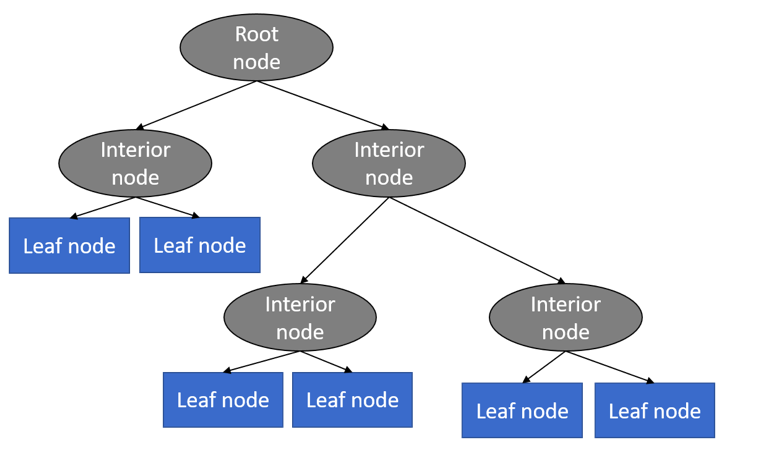

In [122]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split

In [188]:
#divindo os dados
train_x, val_x, train_y, val_y = train_test_split(x,y,random_state = 0)

In [126]:
#treinando o modelo
tree_model = DecisionTreeRegressor(random_state=0)
tree_model.fit(train_x,train_y)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=0, splitter='best')

In [127]:
#prevendo
val_pred = tree_model.predict(val_x)

In [128]:
from sklearn.metrics import mean_absolute_error

In [129]:
print(mean_absolute_error(val_y,val_pred))

5.284315789473683


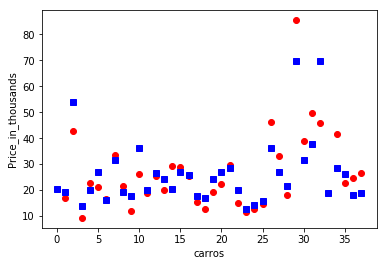

In [131]:
import matplotlib.pyplot as plt
plt.plot(val_y.values[:], 'ro', val_pred,'bs')
plt.ylabel('Price_in_thousands')
plt.xlabel('carros')
plt.show()

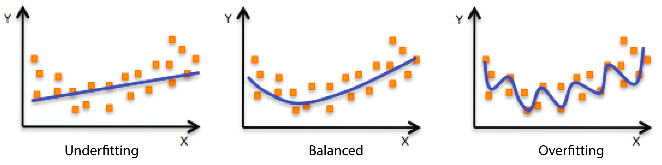

In [189]:
tree_model = DecisionTreeRegressor(max_leaf_nodes= 19,random_state=0)
tree_model.fit(train_x,train_y)
val_pred = tree_model.predict(val_x)
print(mean_absolute_error(val_y,val_pred))

4.510915215924426


In [190]:
from sklearn.ensemble import RandomForestRegressor

In [191]:
tree_model = RandomForestRegressor(random_state=0)
tree_model.fit(train_x,train_y)
val_pred = tree_model.predict(val_x)
print(mean_absolute_error(val_y,val_pred))

4.080076315789472


/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


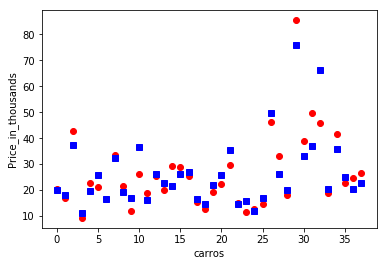

In [192]:
import matplotlib.pyplot as plt
plt.plot(val_y.values[:], 'ro', val_pred,'bs')
plt.ylabel('Price_in_thousands')
plt.xlabel('carros')
plt.show()